In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/positionsalaries-data/position-salaries data.csv


# Credits and Links

* UDEMY - Machine Learning A-Z <sup>TM</sup>

<a id="index"></a>
# Table of Content

1. [Importing Libraries](#1)
2. [Importing Dataset](#2)
3. [Feature Scaling](#3)
4. [SVR Model](#4)
5. [Prediction](#5)
6. [Visualization of SVR Results](#6)
7. [Visualization of the SVR Results - Smoother Curve + High Resolution](#7)

<a id="1"></a>
# 1. Importing Libraries

[Go back to Index](#index)

In [2]:
#1. General
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

#2. Data Preprocessing
##2.1 Fill Missing Data
from sklearn.impute import SimpleImputer

##2.2 Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

##2.3 Splitting Train and Test
from sklearn.model_selection import train_test_split

##2.4 Feature Scaling
from sklearn.preprocessing import StandardScaler

#3. SVR Regression
from sklearn.svm import SVR

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id="2"></a>
# 2. Importing Dataset

[Go back to Index](#index)

In [3]:
df = pd.read_csv("/kaggle/input/positionsalaries-data/position-salaries data.csv")
df.head(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000


In [4]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:,-1].values

In [5]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [6]:
X.shape

(10, 1)

In [7]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [8]:
y.shape

(10,)

In [9]:
# For feature scaling -> 2D Array is required
y = y.reshape(len(y),1)
y.shape

(10, 1)

<a id="3"></a>
# 3. Feature Scaling

[Go back to Index](#index)

In [10]:
sc_X, sc_y = StandardScaler(), StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [11]:
#position scaling
# Range:= -3 to +3
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [12]:
#salary scaling
# Range:= -3 to +3
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

<a id="4"></a>
# 4. SVR Model

[Go back to Index](#index)

In [13]:
#Kernel:= RBF -> Radial Basis Function
regressor = SVR(kernel = 'rbf')

#Train the whole dataset (post Feature Scaling)
regressor.fit(X, y)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

<a id="5"></a>
# 5. Prediction

[Go back to Index](#index)

Inverse Transformation - get the original format by inversing the feature scaling transform

In [14]:
#Inverse transform the y Feature Scaler and then reshape by inversing ( the scaling ) it again to avoid formatting errors
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

### Note:

Be careful when you run the transform/inverse_transform codes, it gives different result based on the <b>order</b> of the cells you run

<a id="6"></a>
# 6. Visualization of the SVR Results

[Go back to Index](#index)

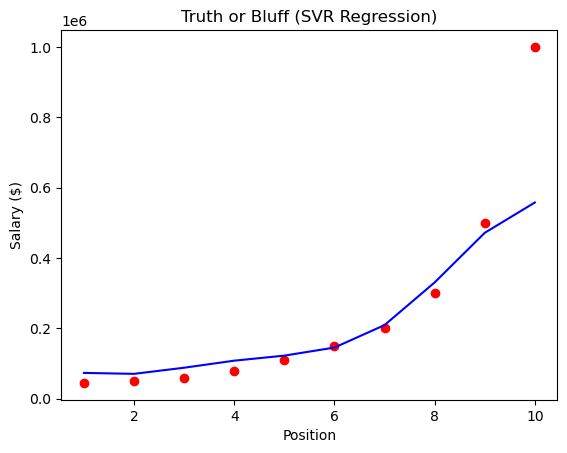

In [15]:
plt.title("Truth or Bluff (SVR Regression)")
plt.xlabel("Position")
plt.ylabel("Salary ($)")

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color="red")
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color="blue")
plt.show()

<a id="7"></a>
# 7. Visualization of the SVR Results - Smoother Curve + High Resolution

[Go back to Index](#index)

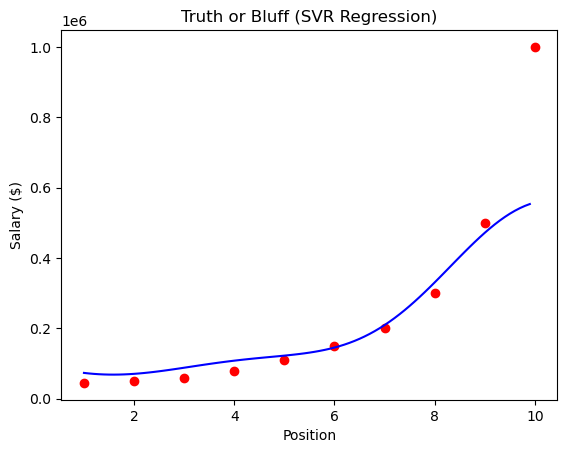

In [16]:
plt.title("Truth or Bluff (SVR Regression)")
plt.xlabel("Position")
plt.ylabel("Salary ($)")

X_new = sc_X.inverse_transform(X)
X_grid = np.arange(min(X_new), max(X_new), 0.1)
X_grid = X_grid.reshape(len(X_grid),1)

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color="red")
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color="blue")
plt.show()